<a href="https://colab.research.google.com/github/whitez1/2022F-Ajou-ML/blob/main/HW03_202022304_%EC%9E%A5%ED%9D%AC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [12]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

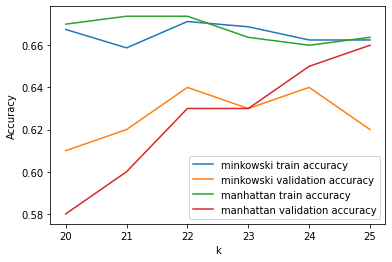

k는 21일 때 test_accuracy:  0.69


In [14]:
### 문제 1 ###

#random seed를 사용하여 split set 고정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=0)

k_list= range(20, 26) # k값 20~25
train_acc1 = []
validation_acc1 = []
train_acc2 = []
validation_acc2 = []

#minkowski 거리 척도를 이용해서 k값에 따른 train, validation 정확도 구하기
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
  classifier.fit(X_train, y_train)
  train_acc1.append(classifier.score(X_train, y_train))
  validation_acc1.append(classifier.score(X_val, y_val))

#manhattan 거리 척도를 이용해서 k값에 따른 train, validation 정확도 구하기
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
  classifier.fit(X_train, y_train)
  train_acc2.append(classifier.score(X_train, y_train))
  validation_acc2.append(classifier.score(X_val, y_val))

#거리 척도, k값에 따라 train, validation 정확도를 한 그래프
plt.plot(k_list, train_acc1, label='minkowski train accuracy')
plt.plot(k_list, validation_acc1, label='minkowski validation accuracy')
plt.plot(k_list, train_acc2, label='manhattan train accuracy')
plt.plot(k_list, validation_acc2, label='manhattan validation accuracy')
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

#찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 출력
best_k= 21
classifier = KNeighborsClassifier(n_neighbors = best_k, metric = 'manhattan')
X_train=pd.concat([X_train, X_val])
y_train=pd.concat([y_train, y_val])
classifier.fit(X_train, y_train)
print('k는 21일 때 test_accuracy: ',classifier.score(X_test, y_test))
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터: 거리 척도= manhatton, k=21
- 설명: 훈련 셋보다 테스트 셋의 점수가 높거나 두 점수가 너무 낮은 경우는 모델이 훈련 셋에 과소적합되고, 훈련 셋의 점수보다 테스트 셋의 점수가 지나치게 낮은 경우 모델이 훈련 셋에 과대적합됩니다. 따라서, train accuracy와 validation accuracy의 차이가 적은 k 값 중 manhattan 거리 측정법을 사용했을 때 k=21에서 train accuracy가 가장 높았고, minkowski 거리 측정법을 사용했을 때 k=22에서 train accuracy가 가장 높았습니다. 이 중 manhattan의 accuracy가 더 높으므로 최적의 파라미터로 거리 척도는 manhatton k=21로 선정하였습니다.

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [15]:
from sklearn.ensemble import RandomForestClassifier

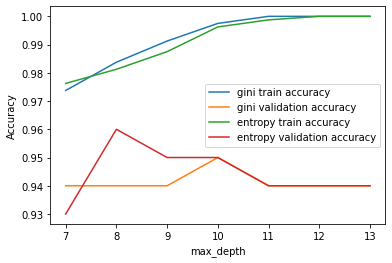

max_depth는 13일 때 test_accuracy:  0.9


In [16]:
### 문제 2 ###
#random seed를 사용하여 split set 고정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=0)

max_depth_list= range(7, 14) # max_depth값 7~13
train_acc1 = []
validation_acc1 = []
train_acc2 = []
validation_acc2 = []

# gini criterion을 이용해서 max depth값에 따른 train, validation 정확도 구하기
for m in max_depth_list:
  classifier = RandomForestClassifier(max_depth=m, criterion='gini', random_state=0)
  classifier.fit(X_train, y_train)
  train_acc1.append(classifier.score(X_train, y_train))
  validation_acc1.append(classifier.score(X_val, y_val))

# entropy criterion을 이용해서 max depth값에 따른 train, validation 정확도 구하기
for m in max_depth_list:
  classifier = RandomForestClassifier(max_depth=m, criterion='entropy', random_state=0)
  classifier.fit(X_train, y_train)
  train_acc2.append(classifier.score(X_train, y_train))
  validation_acc2.append(classifier.score(X_val, y_val))

#criterion, max depth 값에 따라 train, validation 정확도를 한 그래프
plt.plot(max_depth_list, train_acc1, label='gini train accuracy')
plt.plot(max_depth_list, validation_acc1, label='gini validation accuracy')
plt.plot(max_depth_list, train_acc2, label='entropy train accuracy')
plt.plot(max_depth_list, validation_acc2, label='entropy validation accuracy')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

#찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 출력
best_max_depth= 13
classifier = RandomForestClassifier(max_depth=best_max_depth, criterion="gini", random_state=0)
X_train=pd.concat([X_train, X_val])
y_train=pd.concat([y_train, y_val])
classifier.fit(X_train, y_train)
print('max_depth는 13일 때 test_accuracy: ',classifier.score(X_test, y_test))
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터: criterion=gini, max_depth=13
- 설명: 훈련 셋보다 테스트 셋의 점수가 높거나 두 점수가 너무 낮은 경우는 모델이 훈련 셋에 과소적합되고, 훈련 셋의 점수보다 테스트 셋의 점수가 지나치게 낮은 경우 모델이 훈련 셋에 과대적합됩니다. 따라서, train accuracy와 validation accuracy의 차이가 적은 max_depth 값 중 gini criterion을 사용했을 때 max_depth=13에서 train accuracy가 가장 높았고, entropy criterion을 사용했을 때 max_depth=13에서 train accuracy가 가장 높았습니다. gini accuray와 entropy accuracy 모두 근소한 차이가 나므로 criterion은 둘 중 하나를 선택해서 쓰면됩니다. 따라서 최적의 파라미터로 max_depth=13로 선정하였습니다.

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

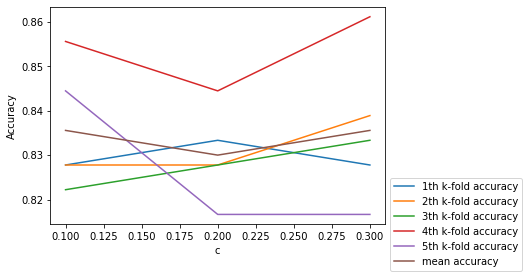

c는 0.3일 때 test_accuracy:  0.81


In [5]:
### 문제 3-1 ###
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
c_list = [0.1, 0.2, 0.3]

acc=[[],[],[],[],[]]
mean_acc=[]
sum=[[],[],[]]
kfold = KFold(n_splits=5)

j=0 
for train_idx, test_idx in kfold.split(X_train): 
  X_train_ , X_val_ = X_train.iloc[train_idx,:], X_train.iloc[test_idx,:]
  y_train_, y_val_ = y_train.iloc[train_idx], y_train.iloc[test_idx]
  for c in c_list:
    clf = SVC(kernel="linear", C=c)
    clf.fit(X_train_, y_train_)
    score=clf.score(X_val_,y_val_)
    acc[j].append(score)
  j+=1

# 평균 정확도 구하기
for i in range(3):
  sum=0
  for j in range(5):
    sum+=acc[j][i]
  avg=float(sum/5)
  mean_acc.append(avg)

#그래프 그리기
for i in range(5):
  s = str(i+1)+'th k-fold accuracy'
  plt.plot(c_list, acc[i], label=s)  
plt.plot(c_list, mean_acc, label='mean accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0))
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.show()

#찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입
best_c = 0.3
clf = SVC(kernel="linear", C=best_c)
clf.fit(X_train,y_train)
print('c는 0.3일 때 test_accuracy: ',clf.score(X_test, y_test))

### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터: c=0.3
- 설명: 평균 정확도에서는 c=0.1과 c=0.3일 때 최대이고, 첫 번째 kfold에서는 c=0.2일 때 정확도가 최대이고, 두 번째 kfold에서는 c=0.3일 때 정확도가 최대이고, 세 번째 kfold에서는 c=0.3일 때 정확도가 최대이고, 네 번째 kfold에서는 c=0.3일 때 정확도가 최대이고, 다섯 번째 kfold에서는 c=0.1일 때 정확도가 최대입니다. c=0.3일 때 정확도가 최대인 경우가 많으므로 최적의 파라미터는 c=0.3입니다.

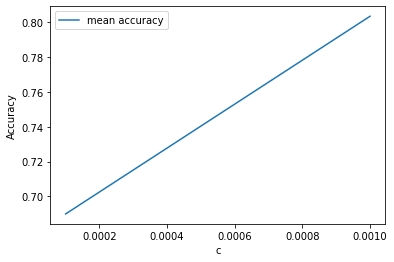

c는0.001일 때 test_accuracy:  0.83


In [11]:
### 문제 3-2 ###
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

#Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
c_list = [0.0001, 0.001]

loocv = LeaveOneOut()

mean_acc=[]

for c in c_list:
  clf = SVC(kernel="linear", C=c)
  scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=loocv)
  mean_acc.append(np.mean(scores))

#그래프 그리기
plt.plot(c_list, mean_acc, label='mean accuracy')
plt.legend()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.show()

#찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입
best_c=0.001
clf = SVC(kernel="linear", C=best_c)
clf.fit(X_train,y_train)
print('c는0.001일 때 test_accuracy: ',clf.score(X_test, y_test))
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터: c = 0.001
- 설명:  c=0.0001일 때 Leave-One-Out CV를 통해 나온 평균 정확도보다 c=0.001일 때의 평균 정확도가 더 높으므로 최적의 파라미터로 c=0.001을 선정하였습니다.

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [17]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [18]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [19]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [20]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [21]:
from sklearn.metrics import r2_score

In [22]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """
    return 1 - (1 - r2(actual, predicted))*(rowcount-1)/(rowcount-featurecount-1) #adjusted r2 score 계산
####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [23]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [24]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [25]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################
            model.fit(X[included+[new_column]], y) 
            predicted=model.predict(X[included+[new_column]])
            p=model.n_features_in_      # feature 개수
            new_scores[new_column]=adjr2(y, predicted, X.shape[0], p)
    
        max_key=max(new_scores,key=new_scores.get) # dictionary max value에 대한 key 찾기
        if (new_scores[max_key] < best_r2): # 현재 max adjusted r2 score가 이전 max adjusted r2 score 보다 작으면 
          changed=True                      
        if changed:
          break                             # while문 빠져나감
        best_r2=new_scores[max_key]
        included.append(max_key)
        
        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

selected_features: ['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [27]:
### 문제 4-3 ###
# train : validation : test 데이터셋의 비율을 8:1:1로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=0)

alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]

#문제 4-1의 forward selection을 통해 얻은 feature만을 가진 데이터를 사용
X_train = X_train[selected_features] 
X_val = X_val[selected_features]
X_test = X_test[selected_features]

ridge_r2 = [] 
lasso_r2 = []

# 각 모델에서 alpha 값에 대한 R2 score의 변화
for a in alpha:
  ridge = Ridge(alpha=a)
  ridge.fit(X_train, y_train)
  ridge_r2.append(r2_score(y_val, ridge.predict(X_val)))

  lasso = Lasso(alpha=a)
  lasso.fit(X_train, y_train)
  lasso_r2.append(r2_score(y_val, lasso.predict(X_val)))

best_alpha_in_ridge = alpha[ridge_r2.index(max(ridge_r2))]
best_alpha_in_lasso = alpha[lasso_r2.index(max(lasso_r2))]
print('Ridge regression 모델 최적의 alpha 값: ',best_alpha_in_ridge)
print('Lasso regression 모델 최적의 alpha 값: ', best_alpha_in_lasso)

### 코드 작성 ###

Ridge regression 모델 최적의 alpha 값:  0.0001
Lasso regression 모델 최적의 alpha 값:  0.0001


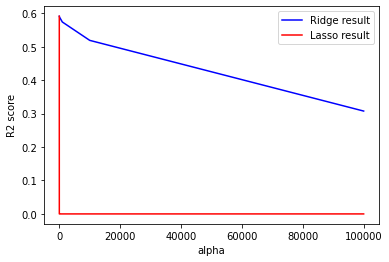

In [28]:
### 문제 4-3 ###
plt.plot(alpha, ridge_r2, label='Ridge result', color='blue') #파란색 선: Ridge 결과
plt.plot(alpha, lasso_r2, label='Lasso result', color='red') #빨간색 선 : Lasso 결과
plt.legend()
plt.xlabel("alpha") # x축: alpha 값
plt.ylabel("R2 score") # y축: R2 score 값
plt.show()
### 그래프 작성 ###

- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.0001

In [29]:
# 최종 결과 출력
ridge = Ridge(alpha=best_alpha_in_ridge) #찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 출력
lasso = Lasso(alpha=best_alpha_in_lasso)

X_train=pd.concat([X_train, X_val])
y_train=pd.concat([y_train, y_val])

ridge.fit(X_train, y_train)
print('Ridge regression 모델 train set에 대한 prediction 결과의 r2 socre:', r2_score( y_train, ridge.predict(X_train)))
print('Ridge regression 모델 test set에 대한 prediction 결과의 r2 socre:', r2_score( y_test, ridge.predict(X_test)))

lasso.fit(X_train, y_train)
print('Ridge regression 모델 train set에 대한 prediction 결과의 r2 socre:', r2_score( y_train, lasso.predict(X_train) ))
print('Ridge regression 모델 test set에 대한 prediction 결과의 r2 socre:', r2_score( y_test, lasso.predict(X_test) ))
#여기에 셀까지 문제 4-3인지 모르겠지만 이 셀에 최종 결과 출력을 넣었습니다.

Ridge regression 모델 train set에 대한 prediction 결과의 r2 socre: 0.5769025228154288
Ridge regression 모델 test set에 대한 prediction 결과의 r2 socre: 0.5816199851378894
Ridge regression 모델 train set에 대한 prediction 결과의 r2 socre: 0.5769022072132461
Ridge regression 모델 test set에 대한 prediction 결과의 r2 socre: 0.5815688966164897
